In [13]:
import numpy as np
import os
import datetime
import os
import matplotlib.pyplot as plt
from imageio import imread
from skimage import io, transform
from skimage.transform import resize

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [15]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())

# Batch size handled in class

batch_size = 30
img_size_ht = 120
img_size_wd = 120

In [16]:
def generator(source_path, folder_list, batch_size, factor_ht=0, factor_wd=0 ):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    
    img_idx = np.arange(0,30,2) #create a list of image numbers you want to use for a particular video
    
    while True:
        t = np.random.permutation(folder_list)


        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                   
                    # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        rem_image = len(folder_list)%batch_size
        batch += 1
        if(rem_image!=0):
            batch_data = np.zeros((rem_image,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((rem_image,5)) # batch_labels is the one hot representation of the output
            for folder in range(rem_image): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                   # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
            

In [17]:
def loss(history):
        acc = history.history['categorical_accuracy']
        val_acc = history.history['val_categorical_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(len(history.history['loss']))

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()

In [18]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 25 # choose the number of epochs
print ('# epochs =', num_epochs)
num_classes = 5

# training sequences = 663
# validation sequences = 100
# epochs = 25


### Testing Generator function

Source path =  Project_data/train ; batch size = 32


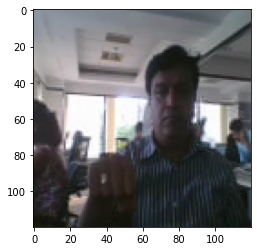

In [19]:
# Test Generator Function

xtrain=generator(train_path,train_doc, 32 )
x=next(xtrain)
plt.imshow(x[0][1][1])

Source path =  Project_data/train ; batch size = 32


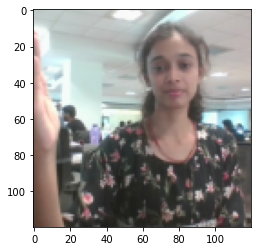

In [20]:
# Test Crop in Generator Function

xtrain=generator(train_path,train_doc, 32, factor_ht=10, factor_wd=10)
x=next(xtrain)
plt.imshow(x[0][1][1])

### Define Keras Classes

In [21]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, LeakyReLU
from tensorflow.keras.applications import EfficientNetB0

In [22]:
# Define Model - Adam - /255 normalization Relu

model_3 = Sequential()

model_3.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(16,(3,3,3),padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(32,(1,3,3), padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(64,(1,2,2), padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (1,3,3)))

model_3.add(Flatten())

model_3.add(Dense(1000, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(500, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(5, activation='softmax'))

In [23]:
optimiser = Adam(learning_rate=0.001) 
model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 15, 120, 120, 8)   656       
                                                                 
 batch_normalization_4 (Batc  (None, 15, 120, 120, 8)  32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 15, 120, 120, 8)   0         
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 7, 60, 60, 8)     0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 7, 60, 60, 16)     3472      
                                                                 
 batch_normalization_5 (Batc  (None, 7, 60, 60, 16)   

In [24]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 30
Epoch 1/25
23/23 [==============================] - ETA: 0s - loss: 3.1617 - categorical_accuracy: 0.2805Source path =  Project_data/val ; batch size = 30

Epoch 1: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00001-3.16172-0.28054-1.56700-0.20000.h5
23/23 [==============================] - 158s 7s/step - loss: 3.1617 - categorical_accuracy: 0.2805 - val_loss: 1.5670 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 2/25
23/23 [==============================] - ETA: 0s - loss: 1.7441 - categorical_accuracy: 0.3665
Epoch 2: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00002-1.74406-0.36652-1.61999-0.36000.h5
23/23 [==============================] - 154s 7s/step - loss: 1.7441 - categorical_accuracy: 0.3665 - val_loss: 1.6200 - val_categorical_accuracy: 0.3600 - lr: 0.0010
Epoch 3/25
23/23 [==============================] - ETA: 0s - loss: 1.2429 - categorical_accuracy: 0.5008
Epoch 3: saving model 

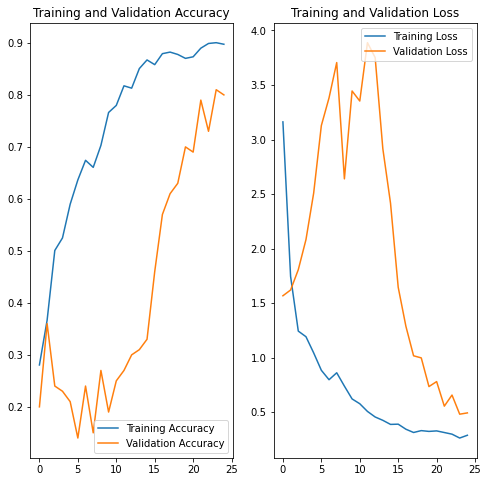

In [25]:
loss(history)

In [26]:
# Define Model - Adam - /255 normalization leaky Relu

model_3a = Sequential()
lrelu = lambda x: LeakyReLU(alpha=0.1)(x)

model_3a.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_3a.add(BatchNormalization())
model_3a.add(Activation(lrelu))
model_3a.add(MaxPooling3D(pool_size= (2,2,2)))

model_3a.add(Conv3D(16,(3,3,3),padding='same'))
model_3a.add(BatchNormalization())
model_3a.add(Activation(lrelu))
model_3a.add(MaxPooling3D(pool_size= (2,2,2)))

model_3a.add(Conv3D(32,(1,3,3), padding='same'))
model_3a.add(BatchNormalization())
model_3a.add(Activation(lrelu))
model_3a.add(MaxPooling3D(pool_size= (2,2,2)))

model_3a.add(Conv3D(64,(1,2,2), padding='same'))
model_3a.add(BatchNormalization())
model_3a.add(Activation(lrelu))
model_3a.add(MaxPooling3D(pool_size= (1,3,3)))

model_3a.add(Flatten())

model_3a.add(Dense(1000, activation=lrelu))
model_3a.add(Dropout(0.5))

model_3a.add(Dense(500, activation=lrelu))
model_3a.add(Dropout(0.5))

model_3a.add(Dense(5, activation='softmax'))

In [27]:
optimiser = Adam(learning_rate=0.001) 
model_3a.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3a.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 15, 120, 120, 8)   656       
                                                                 
 batch_normalization_8 (Batc  (None, 15, 120, 120, 8)  32        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 15, 120, 120, 8)   0         
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 7, 60, 60, 8)     0         
 3D)                                                             
                                                                 
 conv3d_9 (Conv3D)           (None, 7, 60, 60, 16)     3472      
                                                                 
 batch_normalization_9 (Batc  (None, 7, 60, 60, 16)   

In [28]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3a.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 30
Epoch 1/25
23/23 [==============================] - ETA: 0s - loss: 3.8694 - categorical_accuracy: 0.2821Source path =  Project_data/val ; batch size = 30

Epoch 1: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00001-3.86940-0.28205-1.81288-0.18000.h5
23/23 [==============================] - 159s 7s/step - loss: 3.8694 - categorical_accuracy: 0.2821 - val_loss: 1.8129 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 2/25
23/23 [==============================] - ETA: 0s - loss: 1.5777 - categorical_accuracy: 0.4449
Epoch 2: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00002-1.57775-0.44495-1.61038-0.22000.h5
23/23 [==============================] - 158s 7s/step - loss: 1.5777 - categorical_accuracy: 0.4449 - val_loss: 1.6104 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 3/25
23/23 [==============================] - ETA: 0s - loss: 1.1549 - categorical_accuracy: 0.5309
Epoch 3: saving model 

In [ ]:
loss(history)

In [29]:
#Define Model - RMSprop - /255 normalization Relu

model_3b = Sequential()

model_3b.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_3b.add(BatchNormalization())
model_3b.add(Activation('relu'))
model_3b.add(MaxPooling3D(pool_size= (2,2,2)))

model_3b.add(Conv3D(16,(3,3,3),padding='same'))
model_3b.add(BatchNormalization())
model_3b.add(Activation('relu'))
model_3b.add(MaxPooling3D(pool_size= (2,2,2)))

model_3b.add(Conv3D(32,(1,3,3), padding='same'))
model_3b.add(BatchNormalization())
model_3b.add(Activation('relu'))
model_3b.add(MaxPooling3D(pool_size= (2,2,2)))

model_3b.add(Conv3D(64,(1,2,2), padding='same'))
model_3b.add(BatchNormalization())
model_3b.add(Activation('relu'))
model_3b.add(MaxPooling3D(pool_size= (1,3,3)))

model_3b.add(Flatten())

model_3b.add(Dense(1000, activation='relu'))
model_3b.add(Dropout(0.5))

model_3b.add(Dense(500, activation='relu'))
model_3b.add(Dropout(0.5))

model_3b.add(Dense(5, activation='softmax'))

In [30]:
optimiser = RMSprop(learning_rate=0.001) 
model_3b.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3b.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 15, 120, 120, 8)   656       
                                                                 
 batch_normalization_12 (Bat  (None, 15, 120, 120, 8)  32        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 15, 120, 120, 8)   0         
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 7, 60, 60, 8)     0         
 g3D)                                                            
                                                                 
 conv3d_13 (Conv3D)          (None, 7, 60, 60, 16)     3472      
                                                                 
 batch_normalization_13 (Bat  (None, 7, 60, 60, 16)   

In [31]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3b.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 30
Epoch 1/25
23/23 [==============================] - ETA: 0s - loss: 5.3387 - categorical_accuracy: 0.2971Source path =  Project_data/val ; batch size = 30

Epoch 1: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00001-5.33867-0.29713-1.64311-0.26000.h5
23/23 [==============================] - 170s 7s/step - loss: 5.3387 - categorical_accuracy: 0.2971 - val_loss: 1.6431 - val_categorical_accuracy: 0.2600 - lr: 0.0010
Epoch 2/25
23/23 [==============================] - ETA: 0s - loss: 1.5207 - categorical_accuracy: 0.3816
Epoch 2: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00002-1.52073-0.38160-1.65575-0.12000.h5
23/23 [==============================] - 172s 8s/step - loss: 1.5207 - categorical_accuracy: 0.3816 - val_loss: 1.6558 - val_categorical_accuracy: 0.1200 - lr: 0.0010
Epoch 3/25
23/23 [==============================] - ETA: 0s - loss: 1.4144 - categorical_accuracy: 0.4887
Epoch 3: saving model 

In [32]:
#Define Model - RMSprop - /255 normalization lrelu

model_3c = Sequential()
lrelu = lambda x: LeakyReLU(alpha=0.1)(x)

model_3c.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,img_size_ht,img_size_wd,3) ))
model_3c.add(BatchNormalization())
model_3c.add(Activation(lrelu))
model_3c.add(MaxPooling3D(pool_size= (2,2,2)))

model_3c.add(Conv3D(16,(3,3,3),padding='same'))
model_3c.add(BatchNormalization())
model_3c.add(Activation(lrelu))
model_3c.add(MaxPooling3D(pool_size= (2,2,2)))

model_3c.add(Conv3D(32,(1,3,3), padding='same'))
model_3c.add(BatchNormalization())
model_3c.add(Activation(lrelu))
model_3c.add(MaxPooling3D(pool_size= (2,2,2)))

model_3c.add(Conv3D(64,(1,2,2), padding='same'))
model_3c.add(BatchNormalization())
model_3c.add(Activation(lrelu))
model_3c.add(MaxPooling3D(pool_size= (1,3,3)))

model_3c.add(Flatten())

model_3c.add(Dense(1000, activation=lrelu))
model_3c.add(Dropout(0.5))

model_3c.add(Dense(500, activation=lrelu))
model_3c.add(Dropout(0.5))

model_3c.add(Dense(5, activation='softmax'))

In [33]:
optimiser = RMSprop(learning_rate=0.001) 
model_3c.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3c.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_16 (Conv3D)          (None, 15, 120, 120, 8)   656       
                                                                 
 batch_normalization_16 (Bat  (None, 15, 120, 120, 8)  32        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 15, 120, 120, 8)   0         
                                                                 
 max_pooling3d_16 (MaxPoolin  (None, 7, 60, 60, 8)     0         
 g3D)                                                            
                                                                 
 conv3d_17 (Conv3D)          (None, 7, 60, 60, 16)     3472      
                                                                 
 batch_normalization_17 (Bat  (None, 7, 60, 60, 16)   

In [35]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3c.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 30
Epoch 1/25
23/23 [==============================] - ETA: 0s - loss: 1.7929 - categorical_accuracy: 0.3590
Epoch 1: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00001-1.79294-0.35897-1.57916-0.23000.h5
23/23 [==============================] - 172s 7s/step - loss: 1.7929 - categorical_accuracy: 0.3590 - val_loss: 1.5792 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 2/25
23/23 [==============================] - ETA: 0s - loss: 1.7818 - categorical_accuracy: 0.3876
Epoch 2: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-00002-1.78177-0.38763-2.47720-0.16000.h5
23/23 [==============================] - 162s 7s/step - loss: 1.7818 - categorical_accuracy: 0.3876 - val_loss: 2.4772 - val_categorical_accuracy: 0.1600 - lr: 0.0010
Epoch 3/25
23/23 [==============================] - ETA: 0s - loss: 1.4523 - categorical_accuracy: 0.4706
Epoch 3: saving model to Gesture_recog_2022-04-1118_42_53.486567\model-0

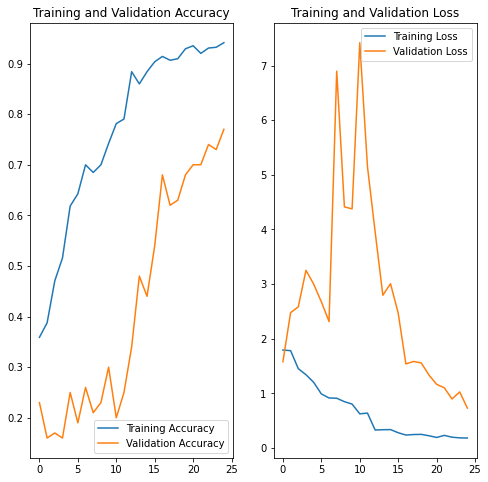

In [36]:
loss(history)

## Redefining Generator Function

In [ ]:
def generator_new(source_path, folder_list, batch_size, factor_ht=0, factor_wd=0 ):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    
    img_idx = np.arange(0,30,2) #create a list of image numbers you want to use for a particular video
    
    while True:
        t = np.random.permutation(folder_list)


        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                   
                    # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    image = (image - np.percentile(image,5))/ (np.percentile(image,95) - np.percentile(image,5))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]
                    batch_data[folder,idx,:,:,1] = image[:,:,1]
                    batch_data[folder,idx,:,:,2] = image[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        rem_image = len(folder_list)%batch_size
        batch += 1
        if(rem_image!=0):
            batch_data = np.zeros((rem_image,len(img_idx),img_size_ht,img_size_wd,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((rem_image,5)) # batch_labels is the one hot representation of the output
            for folder in range(rem_image): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                   # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Resize and Normalize
                    image = resize(image,(img_size_ht,img_size_wd))
                    image = (image - np.percentile(image,5))/ (np.percentile(image,95) - np.percentile(image,5))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]
                    batch_data[folder,idx,:,:,1] = image[:,:,1]
                    batch_data[folder,idx,:,:,2] = image[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
            

### Model 3 - Re-run

In [ ]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

In [ ]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3a.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

In [ ]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3b.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

In [ ]:
train_generator = generator_new(train_path, train_doc, batch_size)
val_generator = generator_new(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3c.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)